In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
model_features = pd.read_csv("nn-features.csv")
model_features

,Gender,Age,Anemia,Constipation,Location,Diameter
0,M,53,0,1,descending,3
1,M,53,0,1,descending,3
2,M,53,0,1,descending,5
3,M,49,0,1,ascending,5
4,M,49,0,1,descending,7
...,...,...,...,...,...,...
306,M,0,0,1,descending,0
307,M,62,0,1,descending,3
308,M,62,0,1,descending,3
309,M,62,0,1,hepatik fleksura,2


In [4]:
labels_df = pd.read_csv("nn-labels.csv")
labels_df

,Type
0,nonneoplastic
1,nonneoplastic
2,nonneoplastic
3,nonneoplastic
4,neoplastic
...,...
306,neoplastic
307,neoplastic
308,neoplastic
309,neoplastic


In [5]:
target_names = list(labels_df.Type)
target = []
for i in target_names:
    if i == 'nonneoplastic':
        target.append(0)
    else:
        target.append(1)

In [6]:
len(target)

311

In [7]:
labels_df["Target"] = target
labels_df

,Type,Target
0,nonneoplastic,0
1,nonneoplastic,0
2,nonneoplastic,0
3,nonneoplastic,0
4,neoplastic,1
...,...,...
306,neoplastic,1
307,neoplastic,1
308,neoplastic,1
309,neoplastic,1


In [8]:
dummies = pd.get_dummies(model_features[["Location", "Gender"]], drop_first=True)
dummies

,Location_ascending,Location_cecum,Location_colon,Location_descending,Location_hepaticflexure,Location_hepatik fleksura,Location_rectosigmoid,Location_rectum,Location_sigmoid,Location_sigmoid,Location_splenicflexure,Location_splenik fleksura,Location_transverse,Location_valf,Gender_M
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
307,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
308,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
309,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [9]:
dummies["Age"] = model_features.Age
dummies["Diameter"] = model_features.Diameter
dummies["Anemia"] = model_features.Anemia
dummies["Constipation"] = model_features.Constipation
dummies

,Location_ascending,Location_cecum,Location_colon,Location_descending,Location_hepaticflexure,Location_hepatik fleksura,Location_rectosigmoid,Location_rectum,Location_sigmoid,Location_sigmoid,Location_splenicflexure,Location_splenik fleksura,Location_transverse,Location_valf,Gender_M,Age,Diameter,Anemia,Constipation
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,53,3,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,53,3,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,53,5,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,49,5,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,49,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
307,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,62,3,0,1
308,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,62,3,0,1
309,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,62,2,0,1


In [10]:
X = dummies
y = labels_df["Target"]

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [14]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [15]:
clf.score(X_train, y_train)

0.9838709677419355

In [16]:
clf.score(X_test, y_test)

0.5873015873015873

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.62      0.76      0.68        37

    accuracy                           0.59        63
   macro avg       0.56      0.55      0.55        63
weighted avg       0.57      0.59      0.57        63



In [18]:
confusion_matrix(y_test, y_preds)

array([[ 9, 17],
       [ 9, 28]], dtype=int64)

In [20]:
np.random.seed(42)
for i in range(100, 1500, 100):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 100 estimators...
Model accuracy on test set: 55.56%

Trying model with 200 estimators...
Model accuracy on test set: 55.56%

Trying model with 300 estimators...
Model accuracy on test set: 55.56%

Trying model with 400 estimators...
Model accuracy on test set: 53.97%

Trying model with 500 estimators...
Model accuracy on test set: 55.56%

Trying model with 600 estimators...
Model accuracy on test set: 55.56%

Trying model with 700 estimators...
Model accuracy on test set: 55.56%

Trying model with 800 estimators...
Model accuracy on test set: 55.56%

Trying model with 900 estimators...
Model accuracy on test set: 57.14%

Trying model with 1000 estimators...
Model accuracy on test set: 55.56%

Trying model with 1100 estimators...
Model accuracy on test set: 55.56%

Trying model with 1200 estimators...
Model accuracy on test set: 55.56%

Trying model with 1300 estimators...
Model accuracy on test set: 55.56%

Trying model with 1400 estimators...
Model accuracy on test 

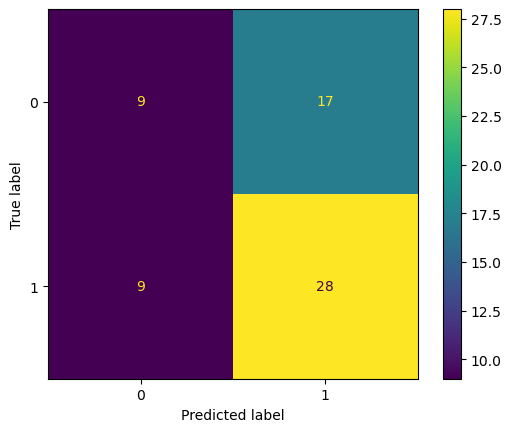

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()